# REMA surface elevations

**Description:**  Reference Elevation Model of Antarctica, referenced to the WGS84 ellipsoid.

**Dataset:** 

N.A.

**Associated paper:** 

Howat, Ian M., Claire Porter, Benjamin E. Smith, Myoung-Jong Noh, and Paul Morin. “The Reference Elevation Model of Antarctica.” The Cryosphere 13, no. 2 (February 26, 2019): 665–74. https://doi.org/10.5194/tc-13-665-2019.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [2]:
version_names = [
    "500m",
    "1km",
]

grids = []
for name in version_names:
    data = fetch.rema(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

100%|████████████████████████████████████████| 347M/347M [00:00<00:00, 248GB/s]


Info for 500m
grid spacing: 500.0 m
grid region: (-2700250.0, 2750250.0, -2500250.0, 3342250.0)
grid zmin: -66.4453125
grid zmax: 4702.28125
grid registration: g
##########


100%|███████████████████████████████████████| 103M/103M [00:00<00:00, 90.6GB/s]


Info for 1km
grid spacing: 1000.0 m
grid region: (-2700500.0, 2750500.0, -2500500.0, 3342500.0)
grid zmin: -66.4453125
grid zmax: 4639.3125
grid registration: g
##########


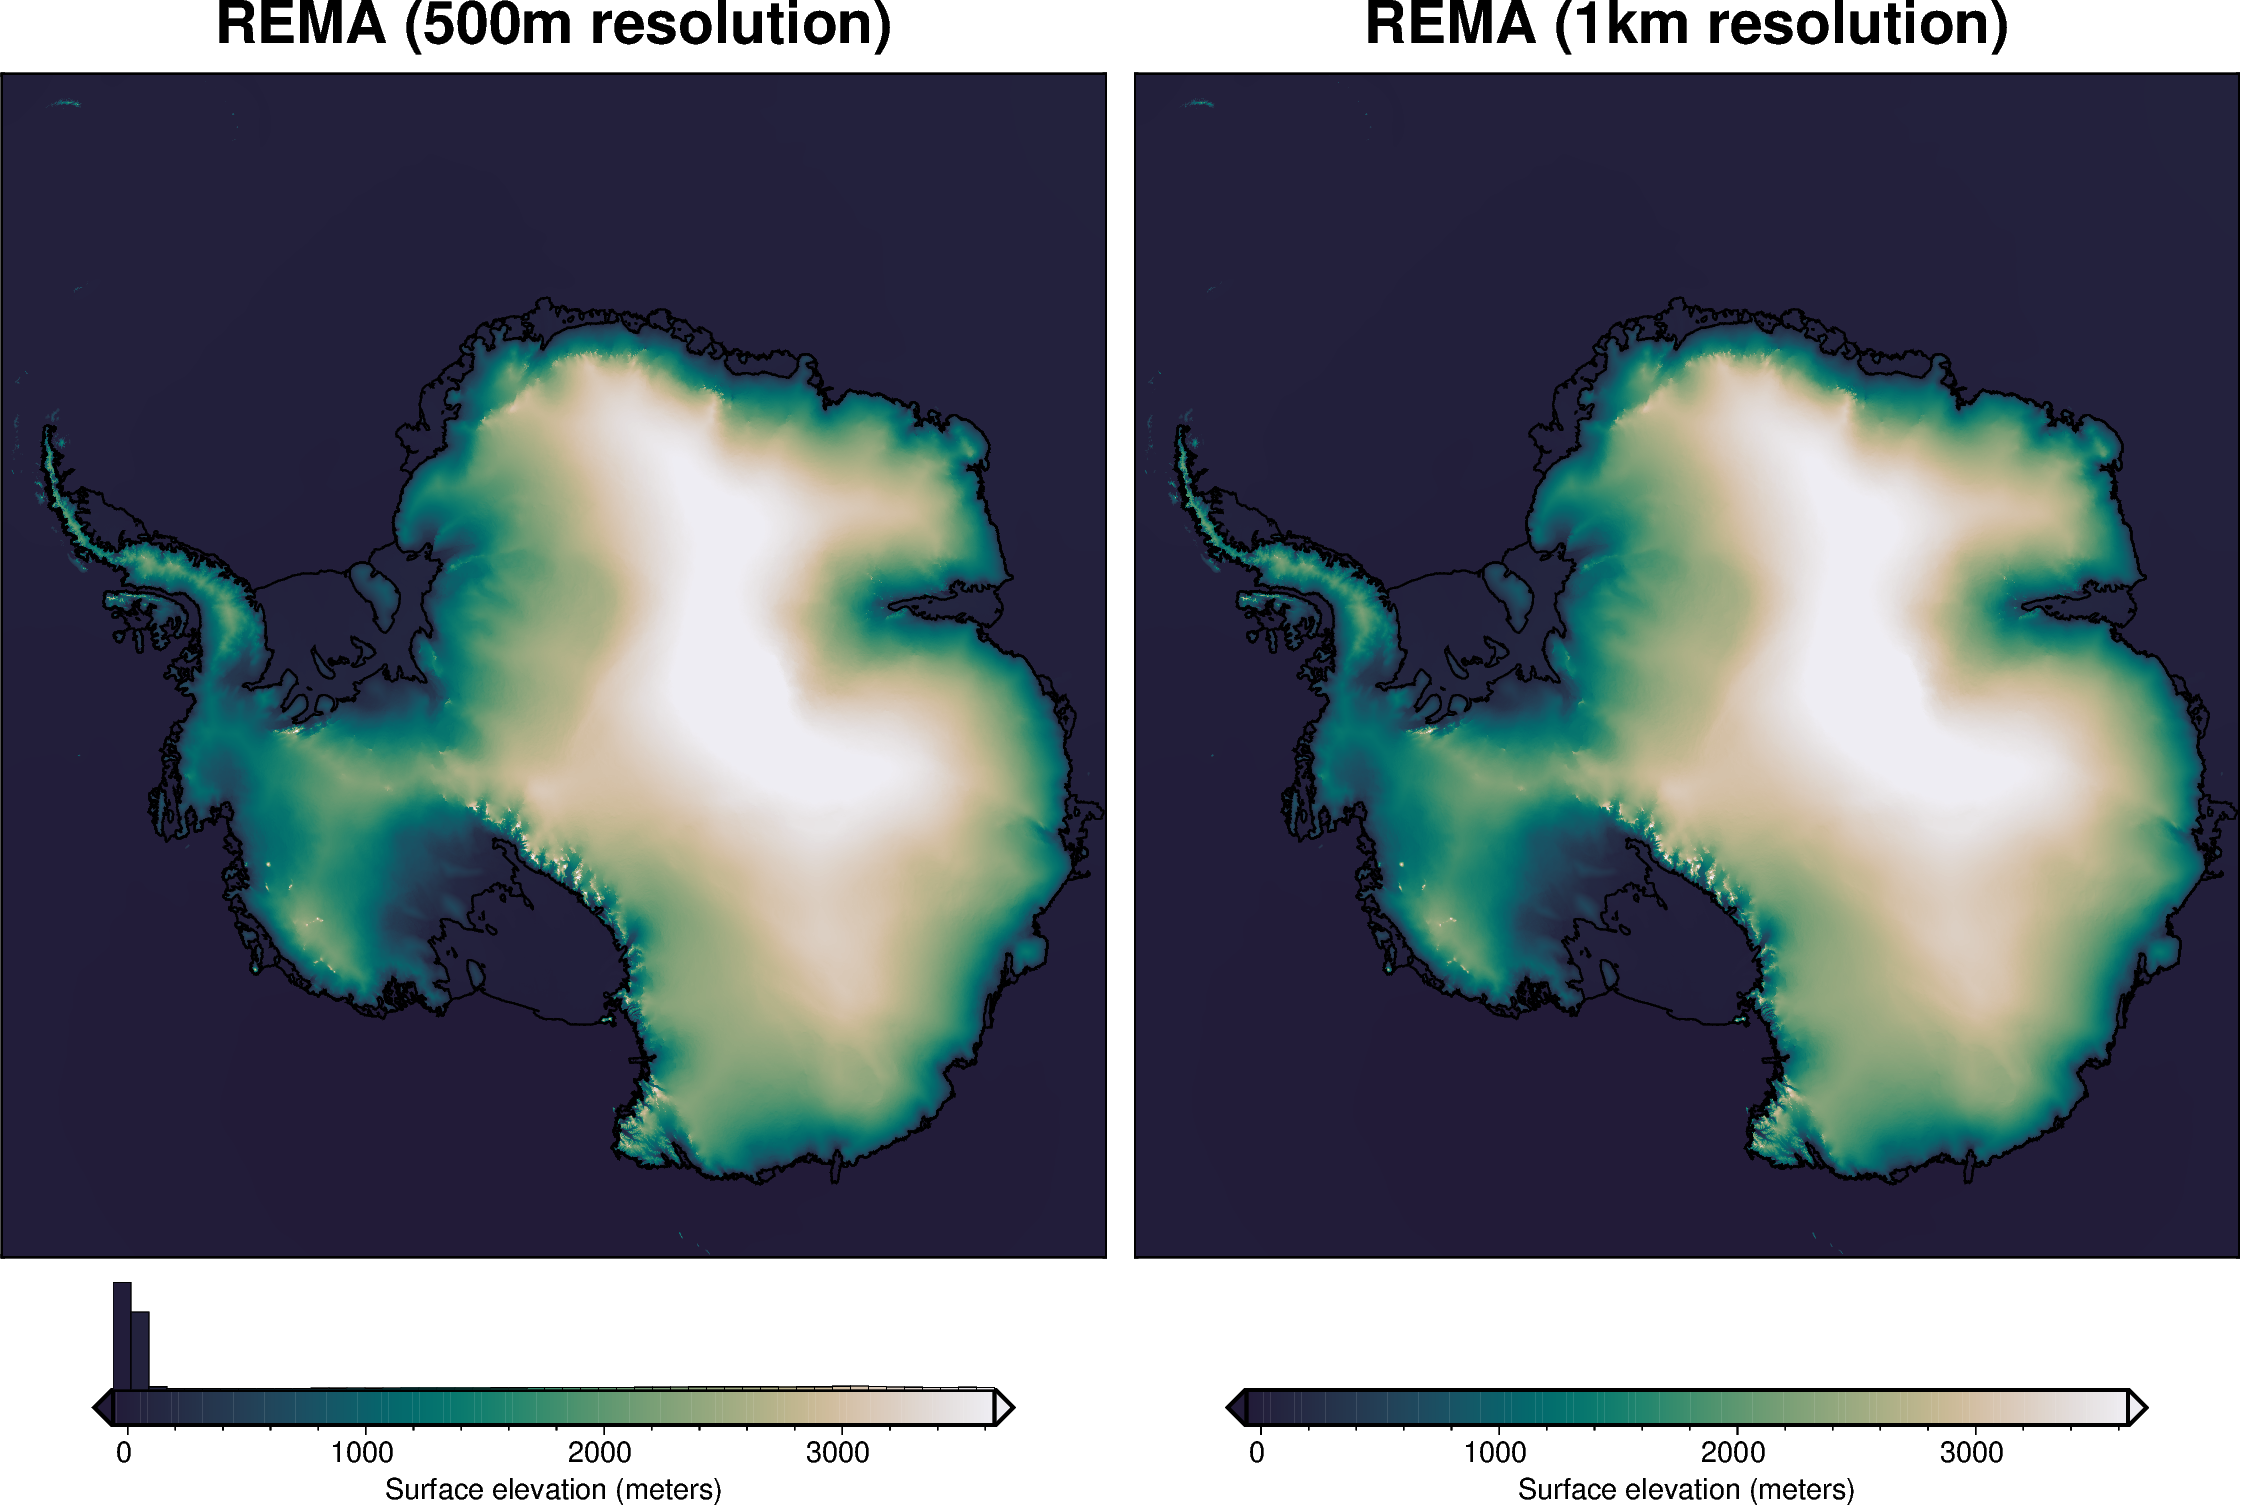

In [3]:
fig = maps.plot_grd(
    grids[0],
    title="REMA (500m resolution)",
    coast=True,
    cbar_label="Surface elevation (meters)",
    hist=True,
    robust=True,
    cmap="rain",
    reverse_cpt=True,
    hemisphere="south",
)
fig = maps.plot_grd(
    grids[1],
    fig=fig,
    origin_shift="x",
    title="REMA (1km resolution)",
    coast=True,
    cbar_label="Surface elevation (meters)",
    hist=True,
    robust=True,
    cmap="rain",
    reverse_cpt=True,
    hemisphere="south",
)
fig.show(dpi=200)